In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv').drop('Id', axis=1)
#drop SepalLengthCm, SepalWidthCm
df = df.drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)
print(df)

     PetalLengthCm  PetalWidthCm         Species
0              1.4           0.2     Iris-setosa
1              1.4           0.2     Iris-setosa
2              1.3           0.2     Iris-setosa
3              1.5           0.2     Iris-setosa
4              1.4           0.2     Iris-setosa
..             ...           ...             ...
145            5.2           2.3  Iris-virginica
146            5.0           1.9  Iris-virginica
147            5.2           2.0  Iris-virginica
148            5.4           2.3  Iris-virginica
149            5.1           1.8  Iris-virginica

[150 rows x 3 columns]


In [3]:
classes = df['Species'].unique()
train = pd.DataFrame()
test = pd.DataFrame()

for c in classes:
    train = pd.concat([train, df[df['Species'] == c].iloc[:40]],ignore_index=True)
    test = pd.concat([test, df[df['Species'] == c].iloc[40:]],ignore_index=True)

print(train)

     PetalLengthCm  PetalWidthCm         Species
0              1.4           0.2     Iris-setosa
1              1.4           0.2     Iris-setosa
2              1.3           0.2     Iris-setosa
3              1.5           0.2     Iris-setosa
4              1.4           0.2     Iris-setosa
..             ...           ...             ...
115            6.1           2.3  Iris-virginica
116            5.6           2.4  Iris-virginica
117            5.5           1.8  Iris-virginica
118            4.8           1.8  Iris-virginica
119            5.4           2.1  Iris-virginica

[120 rows x 3 columns]


In [4]:
def covariance_matrix(train):
    dim = len(train.columns) - 1
    data = train.iloc[:, :dim]
    mean_vector = np.array(data.mean())
    centered_data = data - mean_vector
    cov_matrix = np.dot(centered_data.T, centered_data) / (len(train) - 1)
    return cov_matrix


def fit_Bayes_classifier(train):
    classes = train['Species'].unique()
    dim = len(train.columns) - 1
    mean_vector = {}
    cov_matrix = {}
    inv_cov_matrix = {}
    det_cov_matrix = {}

    for c in classes:
        mean_vector[c] = np.array(train[train['Species'] == c].iloc[:, :dim].mean())
        cov_matrix[c] = np.array(covariance_matrix(train[train['Species'] == c]))
        inv_cov_matrix[c] = np.linalg.inv(cov_matrix[c])
        det_cov_matrix[c] = np.linalg.det(cov_matrix[c])

    return mean_vector, inv_cov_matrix, det_cov_matrix


def Bayes_classifier(train, test_vector, mean_vector, inv_cov_matrix, det_cov_matrix):
    classes = train['Species'].unique()
    dim = len(train.columns) - 1
    bayes_prob = []

    for c in classes:
        apriori = len(train[train['Species'] == c]) / len(train)
        test_vector = np.array(test_vector)
        prob = np.exp(-0.5 * np.dot(np.dot((test_vector - mean_vector[c]).T, inv_cov_matrix[c]), (test_vector - mean_vector[c]))) / (
                    np.power(2 * np.pi, dim / 2) * np.power(det_cov_matrix[c], 0.5))
        bayes_prob.append(prob * apriori)

    return max(bayes_prob),np.argmax(bayes_prob)        

In [5]:
mean_vector, inv_cov_matrix, det_cov_matrix = fit_Bayes_classifier(train)

In [6]:
x_min, x_max = train.iloc[:, 0].min() - 1, train.iloc[:, 0].max() + 1
y_min, y_max = train.iloc[:, 1].min() - 1, train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

discriminant = []

for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        discriminant.append(Bayes_classifier(train,[xx[i][j],yy[i][j]], mean_vector, inv_cov_matrix, det_cov_matrix))

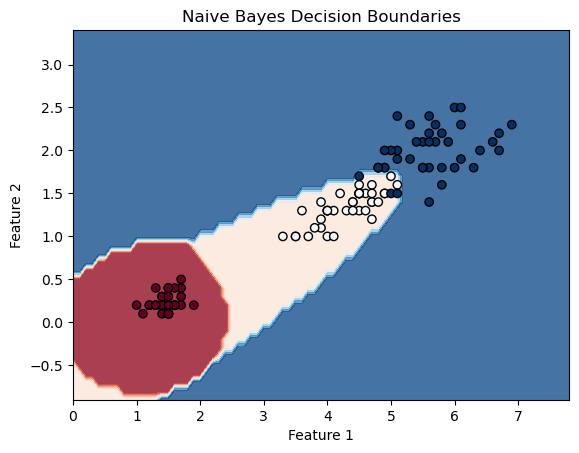

In [7]:
discriminant_values = []
classes_predicted = []

for i in range(len(discriminant)):
    discriminant_values.append(discriminant[i][0])
    classes_predicted.append(discriminant[i][1])

classes_predicted = np.array(classes_predicted).reshape(xx.shape)
plt.contourf(xx, yy, classes_predicted, cmap=plt.cm.RdBu, alpha=0.8)

classes = train['Species'].unique()
color_dict = {}
for i in range(len(classes)):
    color_dict[classes[i]] = i

train['Species'] = train['Species'].map(color_dict)


plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=train['Species'], cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundaries')
plt.show()

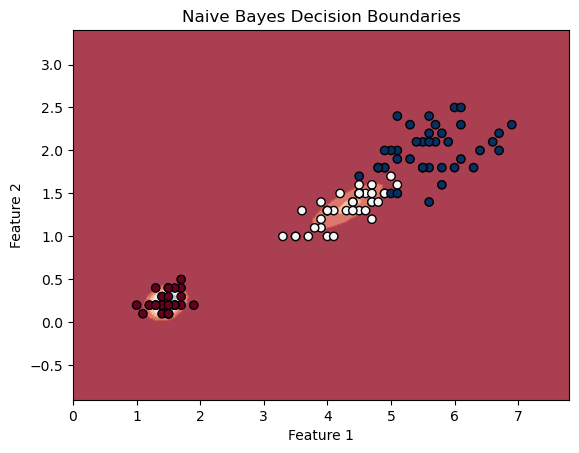

In [8]:
discriminant_values = np.array(discriminant_values).reshape(xx.shape)
plt.contourf(xx, yy, discriminant_values, cmap=plt.cm.RdBu, alpha=0.8)

classes = train['Species'].unique()
color_dict = {}
for i in range(len(classes)):
    color_dict[classes[i]] = i

train['Species'] = train['Species'].map(color_dict)


plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=train['Species'], cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundaries')
plt.show()